___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info


**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
%matplotlib inline

sns.set()

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (12, 8)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
X_train[9].shape

(28, 28)

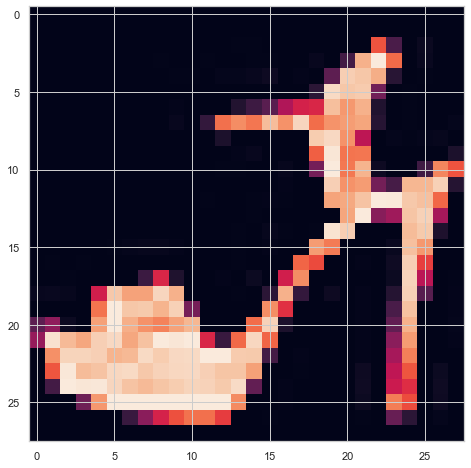

In [7]:
plt.imshow(X_train[9])

In [8]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

In [9]:
y_train[9]

5

In [10]:
np.unique(y_train, return_counts=True)
# 10 unique deger var

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [11]:
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt","Sneaker", "Bag", "Ankle boot"
]

In [12]:
y_train[9]

5

In [13]:
classes[y_train[9]]

'Sandal'

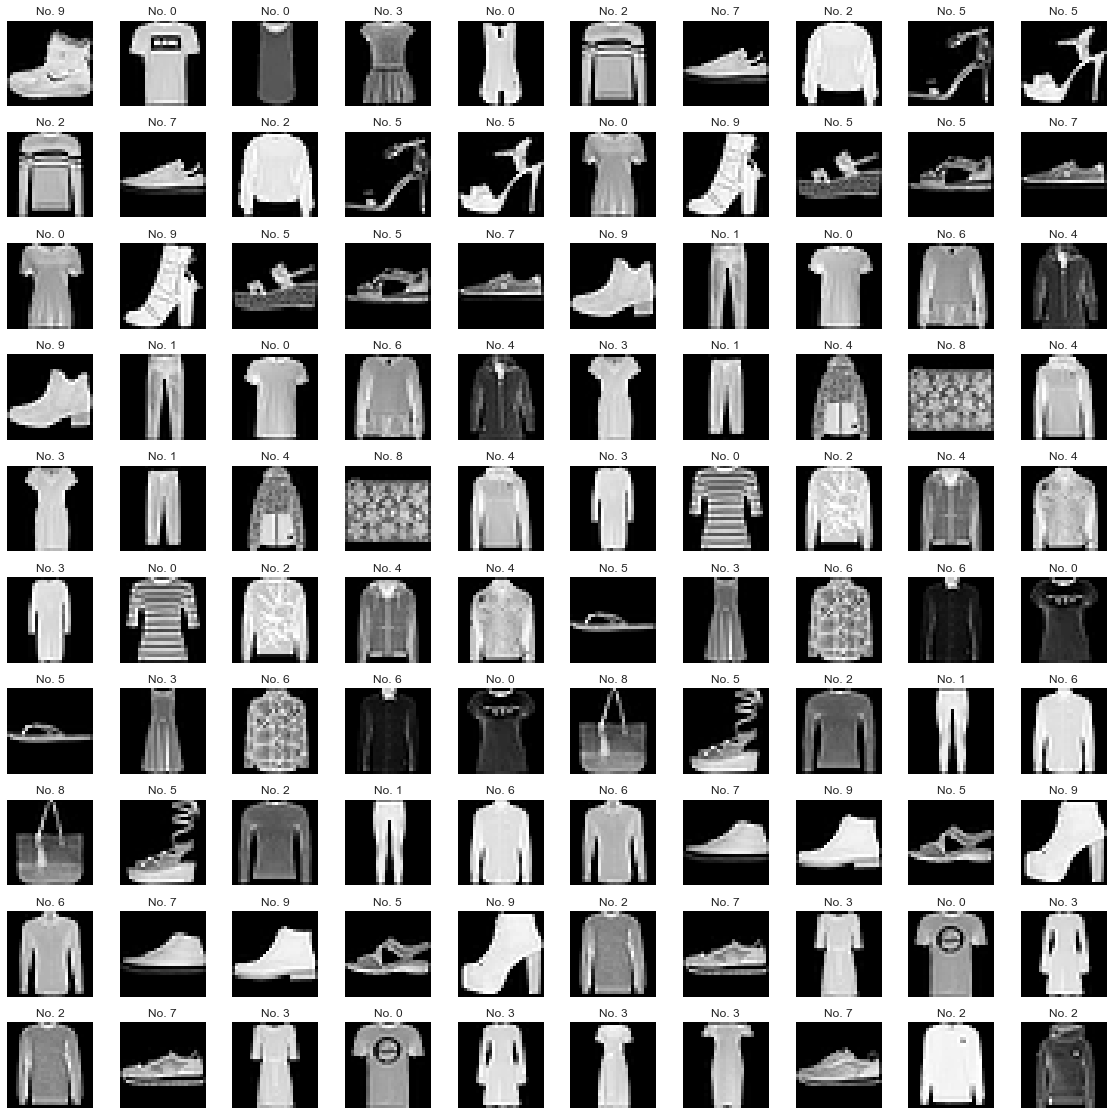

In [14]:
num_rows, num_cols = 10, 10
f, ax = plt.subplots(10, 10, figsize=(20,20),
                     gridspec_kw={'wspace':0.1, 'hspace':0.3}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()
# ilk 100 tanesine bakmak istersek

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
X_train[9].min() 

0

In [16]:
X_train[9].max() 

255

In [17]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
print("Min value is ", X_train[9].min(), "in the training dataset")     
print("Max value is ", X_train[9].max(), "in the training dataset")

Min value is  0.0 in the training dataset
Max value is  1.0 in the training dataset


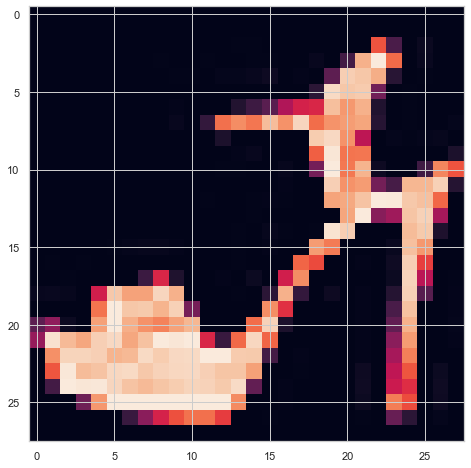

In [19]:
plt.imshow(X_train[9]);

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [21]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [22]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [23]:
X_train.shape, X_test.shape
# hem model hem set islenebilir hale geldi

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)

In [28]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
Y_train.shape
# 10 adet row eklendi

(60000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [35]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5)) # overfitting ihtimaline karsi

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 32)        8096      
                                                                 
 batch_normalization_4 (Batc  (None, 27, 27, 32)       128       
 hNormalization)                                                 
                                                      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [37]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,
                           restore_best_weights=True)

In [38]:
model.fit(X_train,
          Y_train,
          batch_size=32,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.4128 - accuracy: 0.8551 - val_loss: 0.3377 - val_accuracy: 0.8853
Epoch 2/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2935 - accuracy: 0.8979 - val_loss: 0.3926 - val_accuracy: 0.8799
Epoch 3/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.2593 - accuracy: 0.9089 - val_loss: 0.2583 - val_accuracy: 0.9129
Epoch 4/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2433 - accuracy: 0.9159 - val_loss: 0.2714 - val_accuracy: 0.9109
Epoch 5/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2263 - accuracy: 0.9216 - val_loss: 0.2474 - val_accuracy: 0.9093
Epoch 6/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2121 - accuracy: 0.9272 - val_loss: 0.2473 - val_accuracy: 0.9131
Epoch 7/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.2042 - accuracy: 0.9301 - val_loss: 0.3649 

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.4128,0.8551,0.3377,0.8853
1,0.2935,0.8979,0.3926,0.8799
2,0.2593,0.9089,0.2583,0.9129
3,0.2433,0.9159,0.2714,0.9109
4,0.2263,0.9216,0.2474,0.9093


**TASK 7: Plot values of metrics you used in your model.**

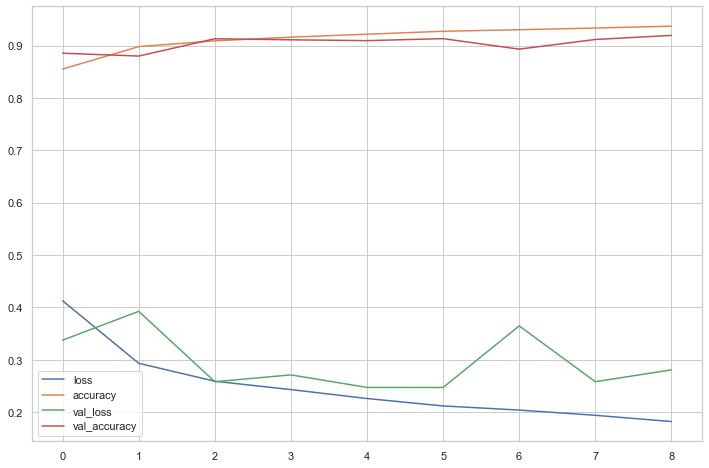

In [40]:
summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [42]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2473 - accuracy: 0.9131


[0.24729670584201813, 0.913100004196167]

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24729670584201813
Test accuracy: 0.913100004196167


In [44]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 3s 9ms/step


array([[1.9010835e-13, 2.5371538e-15, 2.8988738e-12, ..., 2.6049506e-06,
        3.4577384e-12, 9.9999738e-01],
       [3.3220047e-06, 1.3414552e-13, 9.9928254e-01, ..., 6.2332292e-11,
        2.2132484e-08, 1.7181980e-12],
       [1.9692680e-15, 1.0000000e+00, 1.0551508e-16, ..., 1.6260300e-22,
        2.6837741e-16, 1.4963299e-22],
       ...,
       [3.3388203e-12, 9.1710001e-28, 2.2851807e-14, ..., 3.1142302e-16,
        1.0000000e+00, 5.2602504e-16],
       [3.0683677e-14, 1.0000000e+00, 4.9736218e-16, ..., 1.7213202e-21,
        6.9232312e-16, 1.5375759e-21],
       [2.0913352e-05, 2.0801899e-07, 3.0596297e-05, ..., 4.4812194e-01,
        5.2846863e-04, 2.2677731e-02]], dtype=float32)

In [45]:
pred_prob.shape

(10000, 10)

In [46]:
pred_prob[0]

array([1.9010835e-13, 2.5371538e-15, 2.8988738e-12, 1.2960356e-13,
       4.2393205e-13, 4.4097540e-08, 1.2518377e-11, 2.6049506e-06,
       3.4577384e-12, 9.9999738e-01], dtype=float32)

In [47]:
np.argmax(pred_prob[0])

9

In [48]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [49]:
y_pred.shape

(10000,)

In [50]:
print(classification_report(y_test, y_pred))
# en kotu tahminleri 2 numarada icin yapmis 
# her bir sinif icin 1k ornek var 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1000
           1       0.98      0.99      0.99      1000
           2       0.78      0.94      0.85      1000
           3       0.91      0.92      0.91      1000
           4       0.90      0.81      0.85      1000
           5       0.99      0.98      0.99      1000
           6       0.88      0.64      0.74      1000
           7       0.97      0.97      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [51]:
print(confusion_matrix(y_test, y_pred))

[[919   1  37   7   1   1  29   0   5   0]
 [  1 987   1   9   0   0   1   0   1   0]
 [ 12   1 940   8  25   0  14   0   0   0]
 [ 35   9  12 915  14   0  14   0   1   0]
 [  4   1 114  40 808   0  29   0   4   0]
 [  0   0   0   0   0 984   0  11   0   5]
 [166   1 103  22  51   0 644   0  13   0]
 [  0   0   0   0   0   6   0 973   0  21]
 [  2   3   2   2   0   1   1   0 989   0]
 [  0   0   0   0   0   4   0  23   1 972]]


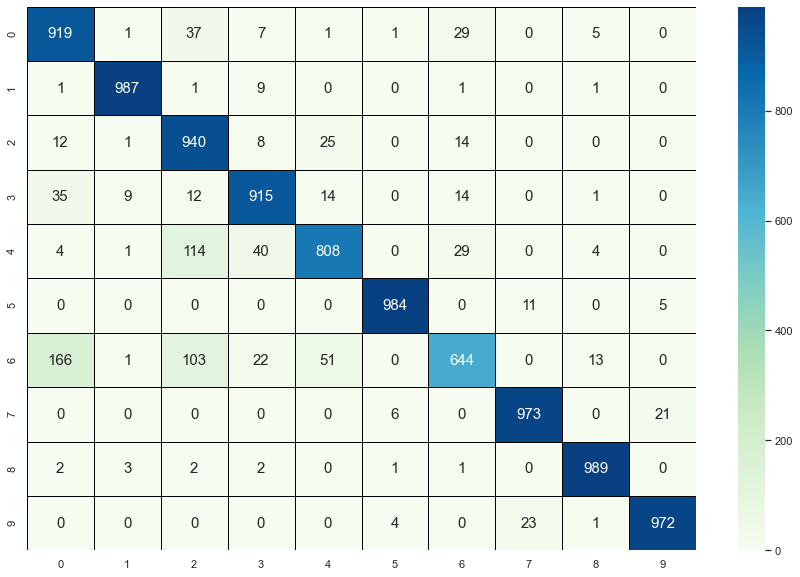

In [79]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            cmap="GnBu",
            linewidths=.5,
            linecolor='black',
            fmt='g',
            annot_kws={"size": 15});

## Prediction

In [83]:
my_image = X_test[10]

In [85]:
my_image.shape

(28, 28, 1)

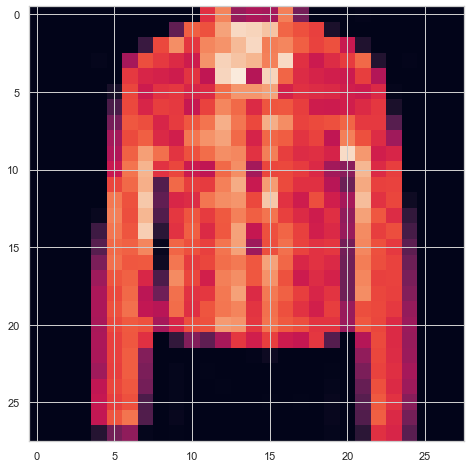

In [86]:
plt.imshow(my_image);

In [87]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 22ms/step


In [88]:
image_prediction

array([[4.2240308e-06, 5.3074437e-11, 4.2679315e-03, 1.5287211e-08,
        9.8055249e-01, 1.7205477e-09, 1.5173296e-02, 1.0713028e-07,
        9.5531682e-08, 1.9031975e-06]], dtype=float32)

In [89]:
np.argmax(image_prediction, axis=1)

array([4])

In [90]:
result = np.argmax(image_prediction, axis=1)
result

array([4])

In [91]:
classes[int(result)]

'Coat'

In [92]:
model.save("cnn-1.h5")

In [93]:
model=tf.keras.models.load_model('cnn-1.h5')

In [94]:
X_test[15].shape

(28, 28, 1)

In [95]:
pred = model.predict(np.expand_dims(X_test[15], axis=0))

1/1 [==============================] - 0s 80ms/step


In [96]:
np.argmax(pred)

1

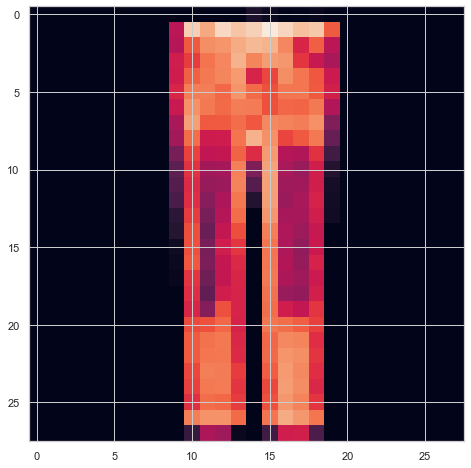

In [98]:
plt.imshow(X_test[15]);

In [99]:
result = np.argmax(pred, axis=1)
result

array([1])

In [100]:
classes[int(result)]

'Trouser'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___